In [7]:
import os
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

data_path = os.path.join(os.getcwd(), 'data')
dataset = os.path.join(data_path, 'Covid Data.csv')
kaggle_data_set = 'meirnizri/covid19-dataset'

separator = f"\n{'-'*100}\n"



In [8]:

class Visualization:
    def __init__(self, data_frame):
        self.df = data_frame
        self.def_size = (8,5)

    def line_plot(self, **qargs) -> None:
        """
        Линейный график
        Входные переменные данных; должны быть числовыми.
        Можно передавать данные напрямую или ссылаться на столбцы в данных.

        :param x: Входная переменная данных.
        :param y: Входная переменная данных.
        :param title: Название
        :param xlabel: Подпись оси X.
        :param ylabel: Подпись оси Y.
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))
        sns.lineplot(x=qargs.get('x'), y=qargs.get('y'))
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.show()

    def count_plot(self, **qargs):
        """
        Столбчатая диаграмма

        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize',self.def_size))

        sns.countplot(data=self.df,
                      x=qargs.get('x'),
                      palette=qargs.get('palette', 'colorblind'),
                      hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.legend (qargs.get('legend',[]))
        plt.show()


    def hist_plot(self, **qargs):
        """
        Гистограмма
        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))

        sns.histplot(data=self.df,
                     x=qargs.get('x'),
                     y=qargs.get('y'),
                     kde=qargs.get('kde', False),
                     bins=qargs.get('bins',  'auto'),
                     palette=qargs.get('palette'),
                     hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))
        plt.legend (qargs.get('legend',[]))
        plt.show()


    def bar_plot(self, **qargs):
        plt.figure(figsize=qargs.get('figsize', self.def_size))


    def heatmap_plot(self, **qargs):
        """
        Тепловая карта

        :param qargs:
        :return:
        """
        fig, ax = plt.subplots(figsize=qargs.get('figsize', self.def_size))
        sns.heatmap(
                    data=qargs.get('data', None),
                    annot=True,
                    mask=qargs.get('mask', None),
                    cmap=qargs.get('cmap', None),
                    vmin=qargs.get('vmin', None),
                    vmax=qargs.get('vmax', None),
                    ax=ax,

        )
        plt.title(qargs.get('title',''))
        plt.xlabel(qargs.get('xlabel',''))
        plt.ylabel(qargs.get('ylabel',''))

        plt.show()

    def pie_plot(self, **qargs):
        """
        Тепловая карта

        :param qargs:
        :return:
        """
        data = qargs.get('data', None)
        plt.figure(figsize=qargs.get('figsize', self.def_size))
        plt.pie(data,

                labels=qargs.get('labels', None),
                autopct=qargs.get('autopct'))

        plt.title(qargs.get('title',''))
        plt.legend(qargs.get('legend',''))

        plt.show()

    def scatter_plot(self, **qargs):
        """
        Диаграмма рассеивания

        :param qargs:
        :return:
        """
        plt.figure(figsize=qargs.get('figsize', self.def_size))

        sns.scatterplot(data=self.df,
                     x=qargs.get('x'),
                     y=qargs.get('y'),
                     palette=qargs.get('palette'),
                     hue=self.df[qargs.get('hue')] if 'hue' in qargs else None
                     )
        plt.title(qargs.get('title', ''))
        plt.xlabel(qargs.get('xlabel', ''))
        plt.ylabel(qargs.get('ylabel', ''))
        plt.legend(qargs.get('legend', []))
        plt.show()


In [9]:

def load_data_csv(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        raise Exception(e)


def load_kaggle_data_set(dataset):
    """
    Загрузка датасета из kaggle.

    Важно: Необходимо предварительно получить API Token.
    Переместите файл kaggle.json в папку ~/.kaggle/ (для Linux и macOS)
    или в C:/Users/<Ваше_имя_пользователя>/.kaggle/ (для Windows).
    Если папка .kaggle не существует, создайте ее.
    :param dataset:
    :return:
    """

    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset=dataset,
                               path='./data',
                               force=True,
                               unzip=True)              # Загрузка и распаковка





In [10]:


def sex_death_visualization(df):
    """
    Визуализация смертности по гендерному признаку
    :param df:
    :return:
    """
    df_tmp = df.copy()
    df_tmp['SEX'] = df_tmp['SEX'].map({1: 'Женщины', 2: 'Мужчины'})
    Visualization(df_tmp).count_plot(x='SEX',
                                 palette='colorblind',
                                 title ='Количество умерших по гендерному признаку.',
                                 ylabel = 'Количество',
                                 legend = ['Выжили','Умерли'],
                                 hue = 'DIED'
    )

def age_death_visualization(df):
    """
    Визуализация смертности по возрасту
    :param df:
    :return:
    """

    Visualization(df).hist_plot(x='AGE',
                                bins=12,
                                title ='Количество умерших в возрасте.',
                                xlabel= 'Возраст',
                                ylabel = 'Количество умерших',
                                )


def correlation_visualization(df):
    """
    Визуализация корреляции параметров

    :param df:
    :return:
    """
    corr = df.drop(columns=['DATE_DIED','DIED']).corr()
    mask = np.triu(np.ones_like(corr), k=-1)

    Visualization(df).heatmap_plot(data = corr,
                                   title='Тепловая карта корреляции параметров',
                                   mask=mask,
                                   annot=True,
                                   cmap='Blues',
                                   vmin=-1,
                                   vmax=1,
                                   figsize = (20,15)
    )

def death_visualization(df):
    """
    Визуализаця умерших и выживших

    :param df:
    :return:
    """
    data = df['DIED'].value_counts()
    labels = list(df['DIED'].value_counts().index)
    labels = ['Выжили' if i == 0 else 'Умерли' for i in labels]
    Visualization(df).pie_plot(data=data,
                               legend=labels,
                               title='Количество умерших и выживших',
                               autopct ='%1.2f%%',
                               figsize=(5,5)
    )

def medical_unit_visualization(df):
        """
        Визуализаця результатов теста на covid в учреждении
        Национальной системы здравоохранения типа 7
        у пациентов в возрасте от 30 до 60 лет.

        :param df:
        :return:
        """
        df_f = df[df['MEDICAL_UNIT'] == 7 & (df['AGE'] >= 30) & (df['AGE'] <= 60)]
        Visualization(df_f).scatter_plot(data=df,
                                         title='Результаты теста на covid\nв учреждении '
                                               'Национальной системы здравоохранения типа 7\n'
                                               'у пациентов в возрасте от 30 до 60 лет',
                                         y=df_f['AGE'],
                                         x=df_f['CLASIFFICATION_FINAL'],
                                         figsize=(9,7),
                                         xlabel= 'Результаты теста на covid\n1...3 - у пациента был диагностирован covid в разной степени;\n4 или выше - пациент не является носителем covid или тест не дал результатов.',
                                         ylabel= 'Возраст'
        )
def date_died_visualization(df):
    df_temp = df[df['DATE_DIED'] != '9999-99-99'][['DATE_DIED', 'DIED']]
    df_temp['DATE_DIED'] = pd.to_datetime(df_temp['DATE_DIED'], format='mixed')
    df_temp = df_temp.groupby('DATE_DIED').sum().reset_index()
    df_temp = df_temp.sort_values(by='DATE_DIED', ascending=True)
    Visualization(df).line_plot(title='График количества смертей за период наблюдения',
                                y=df_temp['DIED'],
                                x=df_temp['DATE_DIED'],
                                figsize=(20, 7),
                                xlabel='Дата',
                                ylabel='Количество умерших'
    )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

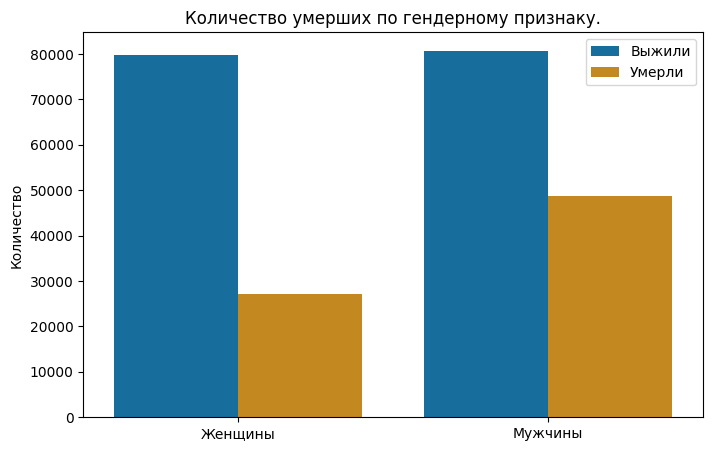

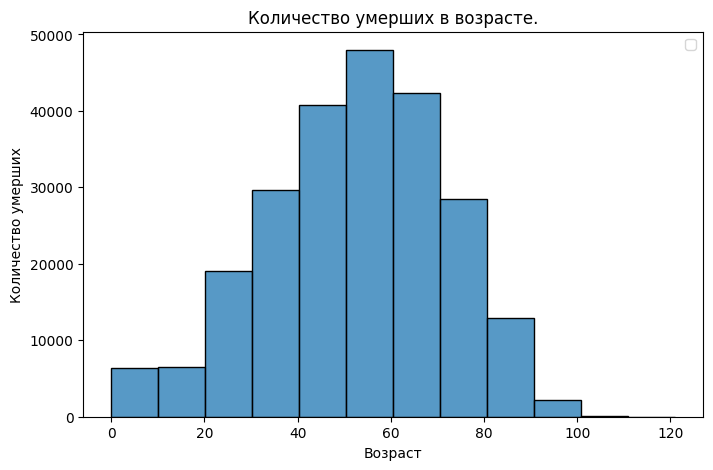

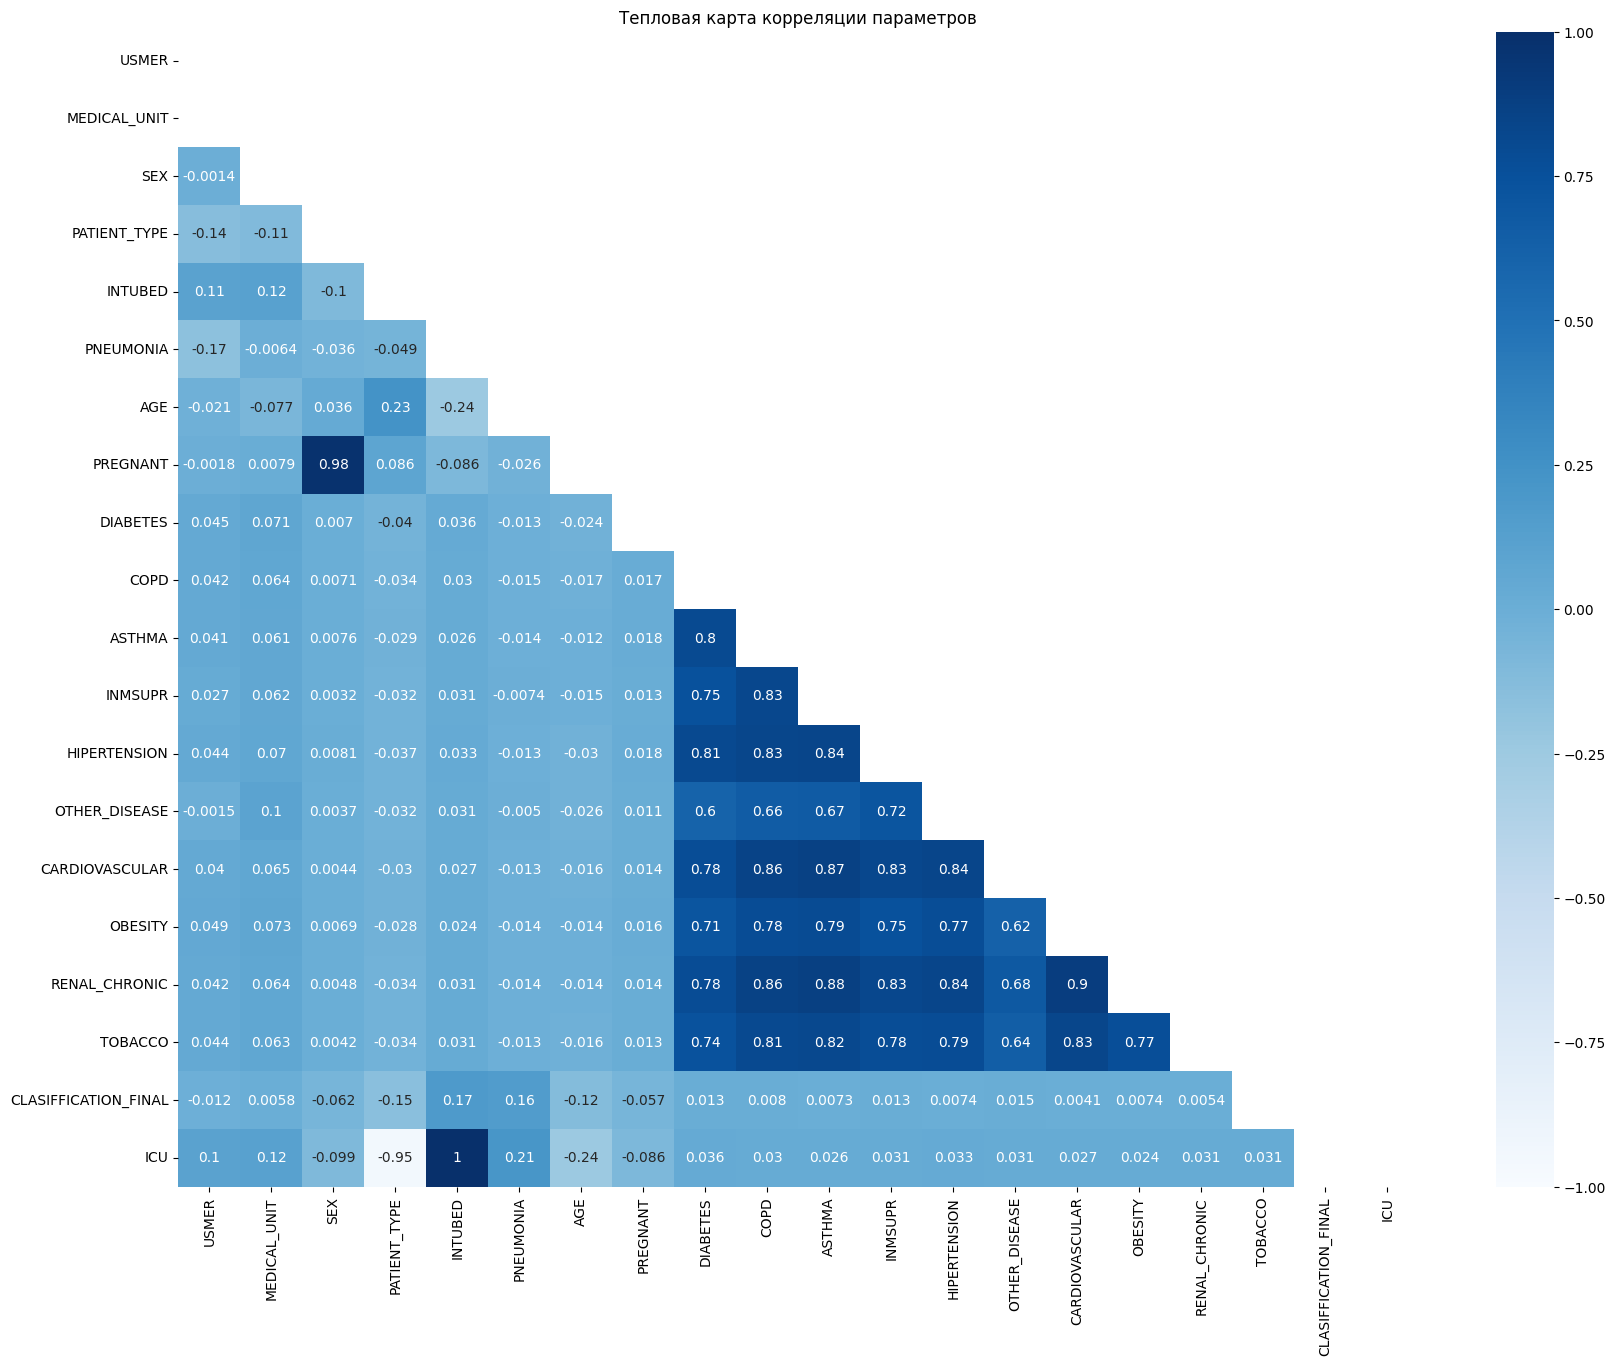

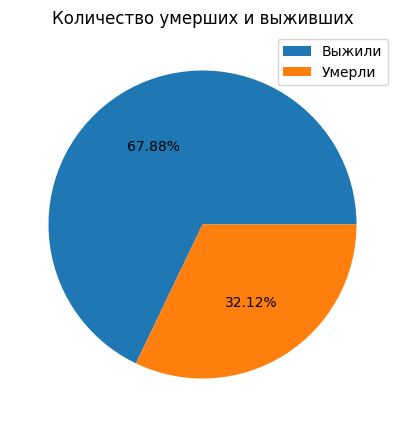

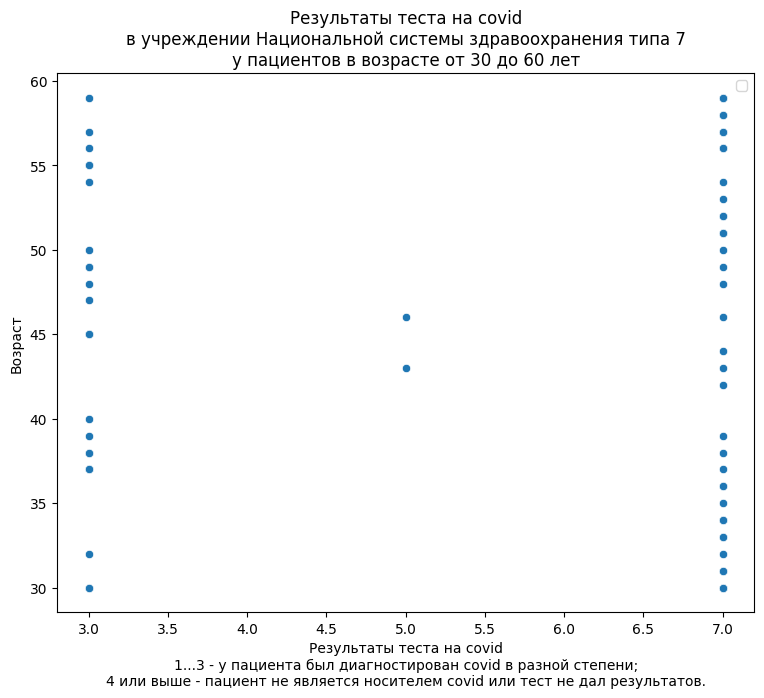

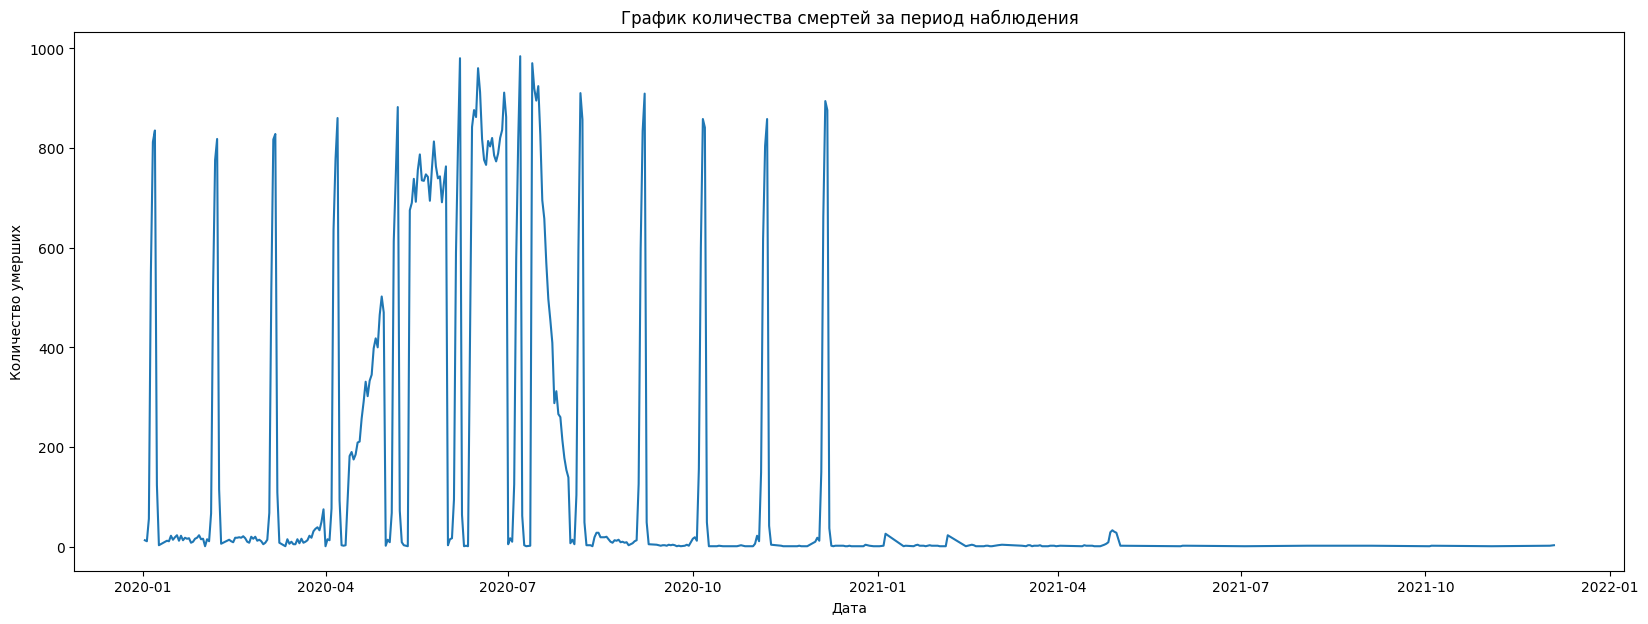

In [11]:
    try:
        if not os.path.exists(dataset):
            load_kaggle_data_set(kaggle_data_set)           # Загрузка файла датасета из kaggle если он не загружен
        df = load_data_csv(dataset)                         # Загрузка файла в датафрейм

        df.info()                                           # Информация о датафрейме (датасете)

        print(separator,
              'Отсутствующие значения:\n',
              df.isna().sum())                              # Отсутствующие значения в столбцах датафрейма. Можно посмотреть и в информации, но так более наглядно.

        print(separator,
              'Количество дублирующихся значений: ',
              df.duplicated().sum())

        df.drop_duplicates(inplace=True)                    # Убрать дубликаты записей

        print(separator,
              'Статистика по датасету:\n',
              df.describe())

        df.loc[df.DATE_DIED == '9999-99-99', 'DIED'] = 0    # Признак выживания (Считаем, что выжил, т.к. отсутствует дата смерти)
        df.loc[df.DATE_DIED != '9999-99-99', 'DIED'] = 1    # Признак смерти

        df.info()
        sex_death_visualization(df)
        age_death_visualization(df)
        correlation_visualization(df)
        death_visualization(df)
        medical_unit_visualization(df)
        date_died_visualization(df)

    except Exception as e:
        print(f'При выполнении произошла ошибка: {e}')

